What Is Classification?
Supervised machine learning algorithms define models that capture relationships among data. Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features.

There are two main types of classification problems:

* Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)

* Multiclass or multinomial classification: three or more classes of the outputs to choose from

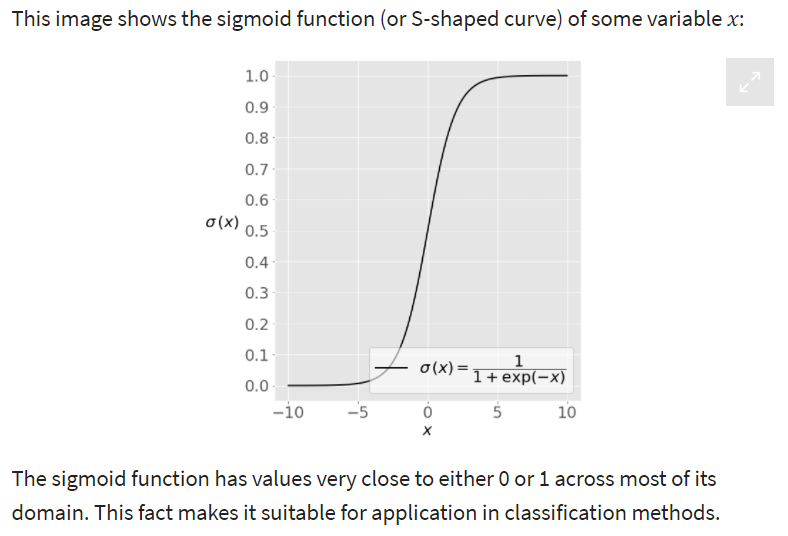

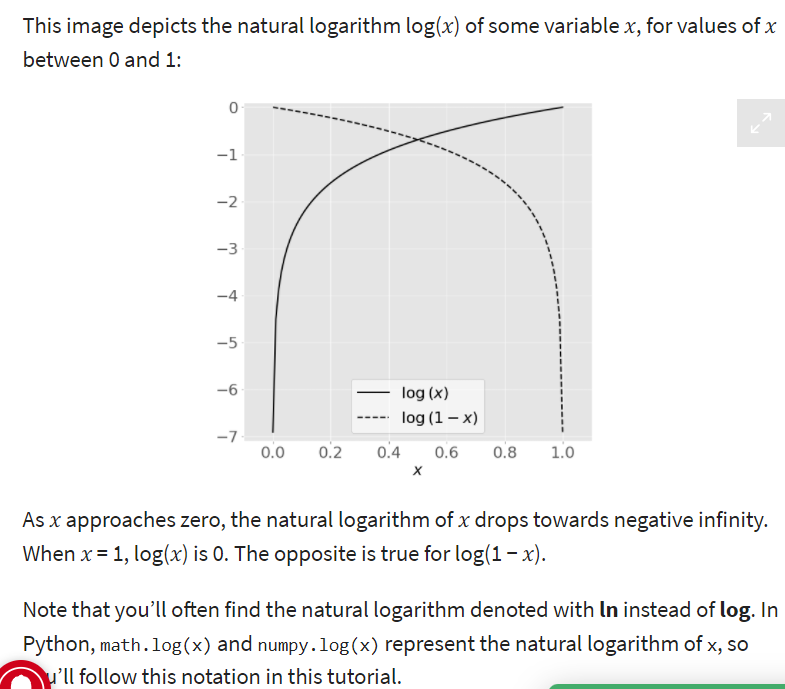

Methodology

Logistic regression is a linear classifier, so you’ll use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the logit. The variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the predicted weights or just coefficients.

The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called model training or fitting.

To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the maximum likelihood estimation and is represented by the equation LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ))).

When 𝑦ᵢ = 0, the LLF for the corresponding observation is equal to log(1 − 𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, then log(1 − 𝑝(𝐱ᵢ)) is close to 0. This is the result you want. If 𝑝(𝐱ᵢ) is far from 0, then log(1 − 𝑝(𝐱ᵢ)) drops significantly. You don’t want that result because your goal is to obtain the maximum LLF. Similarly, when 𝑦ᵢ = 1, the LLF for that observation is 𝑦ᵢ log(𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 1, then log(𝑝(𝐱ᵢ)) is close to 0. If 𝑝(𝐱ᵢ) is far from 1, then log(𝑝(𝐱ᵢ)) is a large negative number.

There are several mathematical approaches that will calculate the best weights that correspond to the maximum LLF, but that’s beyond the scope of this tutorial. For now, you can leave these details to the logistic regression Python libraries you’ll learn to use here!

Once you determine the best weights that define the function 𝑝(𝐱), you can get the predicted outputs 𝑝(𝐱ᵢ) for any given input 𝐱ᵢ. For each observation 𝑖 = 1, …, 𝑛, the predicted output is 1 if 𝑝(𝐱ᵢ) > 0.5 and 0 otherwise. The threshold doesn’t have to be 0.5, but it usually is. You might define a lower or higher value if that’s more convenient for your situation.

There’s one more important relationship between 𝑝(𝐱) and 𝑓(𝐱), which is that log(𝑝(𝐱) / (1 − 𝑝(𝐱))) = 𝑓(𝐱). This equality explains why 𝑓(𝐱) is the logit. It implies that 𝑝(𝐱) = 0.5 when 𝑓(𝐱) = 0 and that the predicted output is 1 if 𝑓(𝐱) > 0 and 0 otherwise.

## Classification Performance

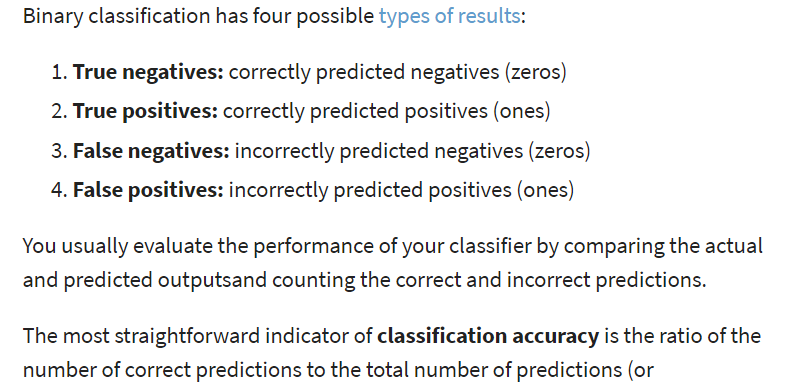

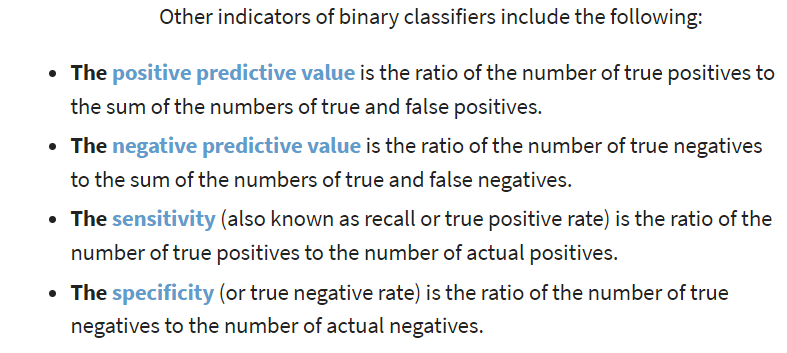

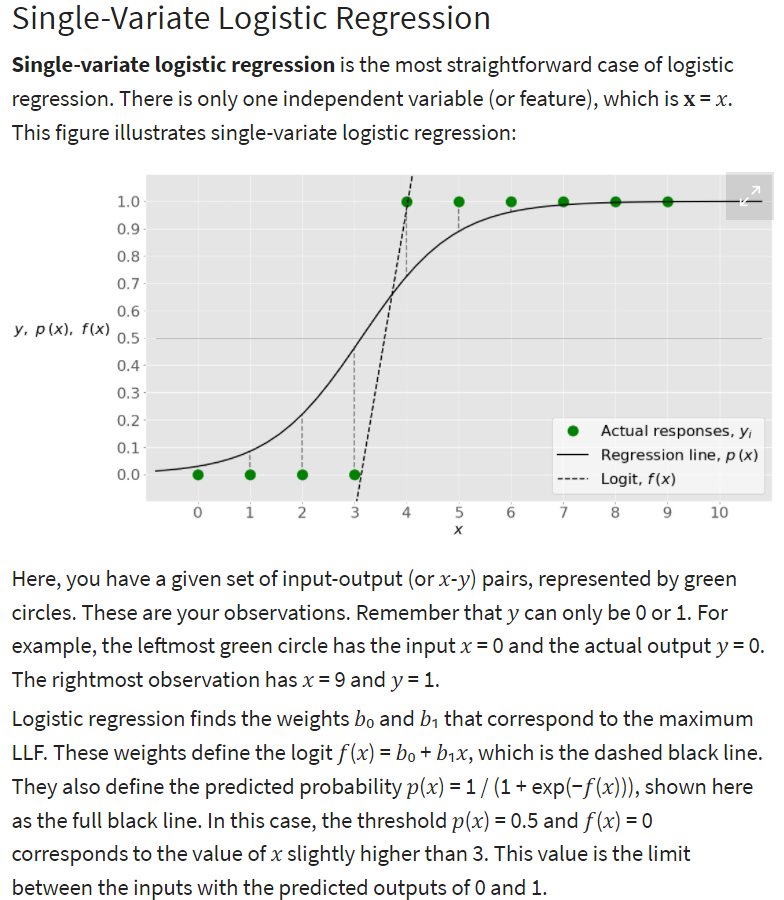

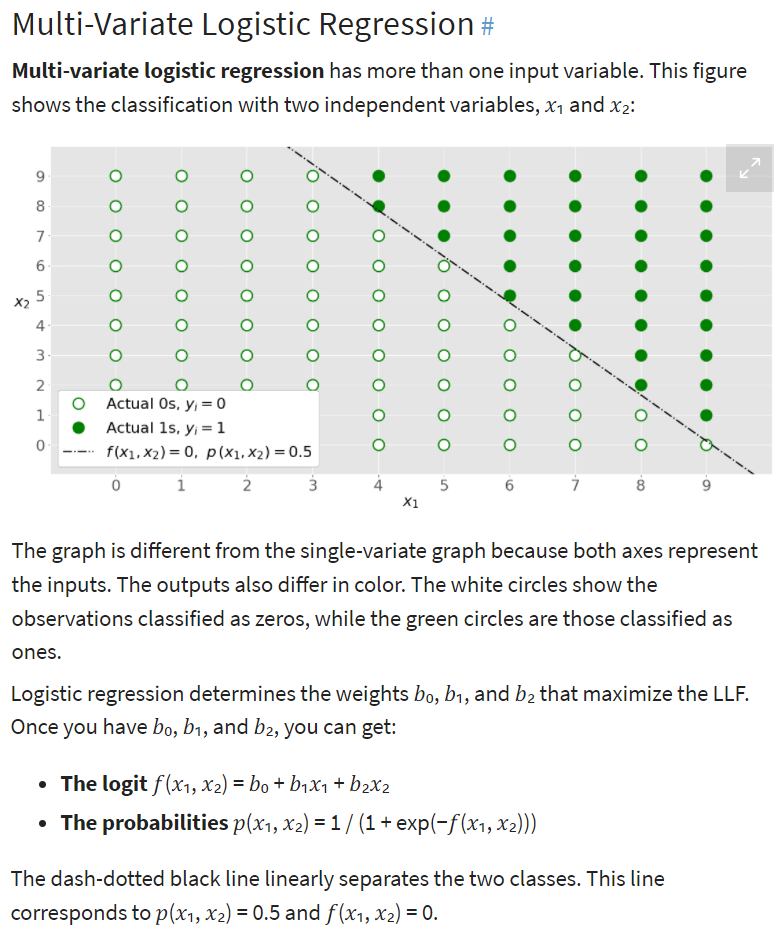

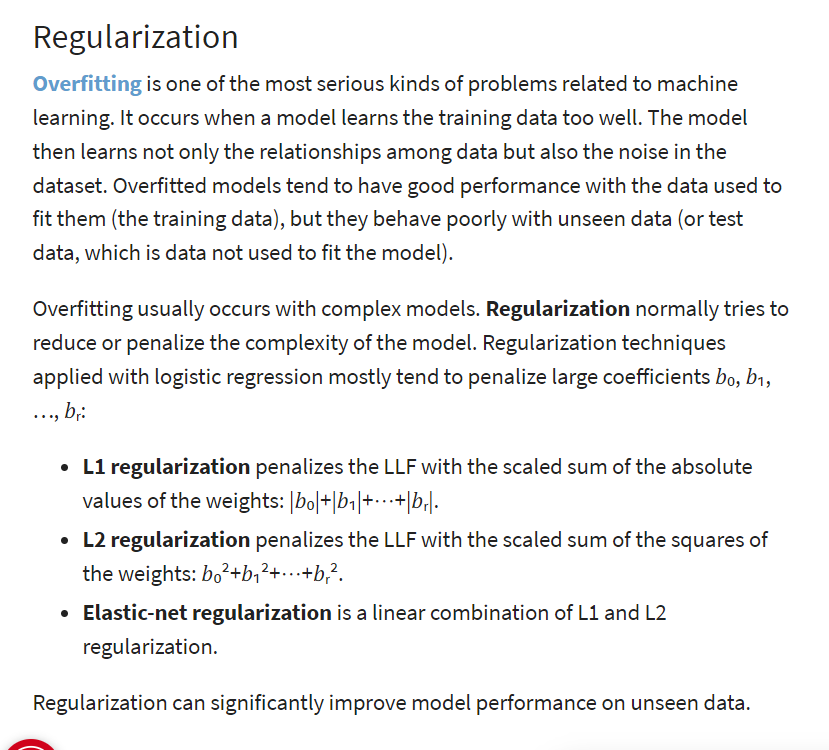

## Logistic Regression Python Packages
* Numpy
* Scikit-learn
* statsModels
* Matplotlib

In [1]:
# Example 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
x = np.arange(10).reshape(-1, 1)   # reshape to one column and default number of elements
print(x.shape)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(y.shape)

(10, 1)
(10,)


In [7]:
# The array x is required to be two-dimensional. 
# It should have one column for each input, and the number of rows should 
# be equal to the number of observations.  
x 

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [8]:
model = LogisticRegression(solver='liblinear', random_state=0)

You should carefully match the solver and regularization method for several reasons:

* solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
* liblinear' solver doesn’t work without regularization.
* newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
* saga' is the only solver that supports elastic-net regularization.

In [9]:
model.fit(x, y)  # determines the coefficients bo, b2, ...,bn that correspoind to the best value of the cost function

LogisticRegression(random_state=0, solver='liblinear')

In [10]:
 model.classes_   # model attributes

array([0, 1])

* Notice : s you can see, 𝑏₀ is given inside a one-dimensional array, while 𝑏₁ is inside a two-dimensional array. 

In [11]:
model.intercept_   # intercept value bo

array([-1.04608067])

In [13]:
model.coef_   # slope b1 value

array([[0.51491375]])

### Evaluate the Model
Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [16]:
# In the matrix above, each row corresponds to a single observation. 
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
# The second column is the probability that the output is one, or 𝑝(𝑥).
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [19]:
y  # real values

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [17]:
model.predict(x)  # predicted values

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

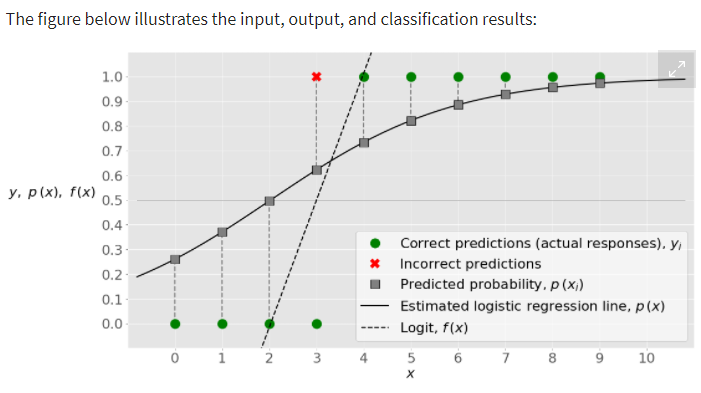

* The green circles represent the actual responses as well as the correct predictions. The red × shows the incorrect prediction. The full black line is the estimated logistic regression line 𝑝(𝑥). The grey squares are the points on this line that correspond to 𝑥 and the values in the second column of the probability matrix. The black dashed line is the logit 𝑓(𝑥).

* The value of 𝑥 slightly above 2 corresponds to the threshold 𝑝(𝑥)=0.5, which is 𝑓(𝑥)=0. This value of 𝑥 is the boundary between the points that are classified as zeros and those predicted as ones.

* For example, the first point has input 𝑥=0, actual output 𝑦=0, probability 𝑝=0.26, and a predicted value of 0. The second point has 𝑥=1, 𝑦=0, 𝑝=0.37, and a prediction of 0. Only the fourth point has the actual output 𝑦=0 and the probability higher than 0.5 (at 𝑝=0.62), so it’s wrongly classified as 1. All other values are predicted correctly.

In [20]:
# When you have nine out of ten observations classified correctly, 
# the accuracy of your model is equal to 9/10=0.9, 
model.score(x, y)

0.9

In [21]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

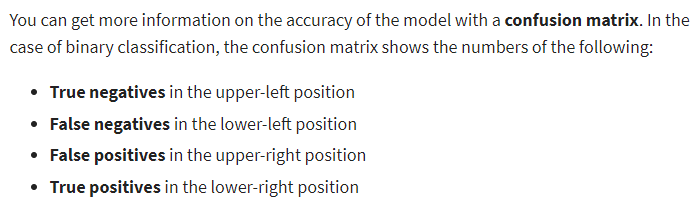

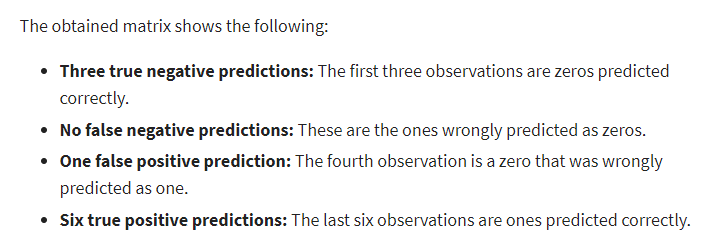

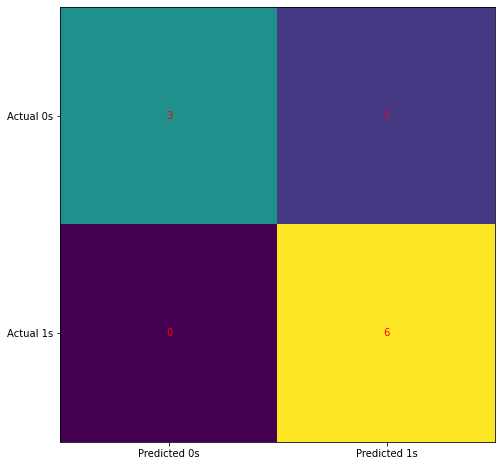

In [22]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [23]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



### improve the model

In [25]:
# regularizataion strength C - parameter

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [27]:
print(f" Model intercept: {model.intercept_}")
print(f" Model coefficient: {model.coef_}")
print(f" Model predictions probabilities: {model.predict_proba(x)}")
print(f" Model predictions: {model.predict(x)}")

 Model intercept: [-3.51335372]
 Model coefficient: [[1.12066084]]
 Model predictions probabilities: [[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
 Model predictions: [0 0 0 0 1 1 1 1 1 1]


* As you can see, the absolute values of the intercept 𝑏₀ and the coefficient 𝑏₁ are larger. This is the case because the LARGER VALUE OF C MEANS WEAKER REGULARIZATION, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.

* Different values of 𝑏₀ and 𝑏₁ imply a change of the logit 𝑓(𝑥), different values of the probabilities 𝑝(𝑥), a different shape of the regression line, and possibly changes in other predicted outputs and classification performance. The boundary value of 𝑥 for which 𝑝(𝑥)=0.5 and 𝑓(𝑥)=0 is higher now

In [28]:
model.score(x, y)

1.0

In [29]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [30]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



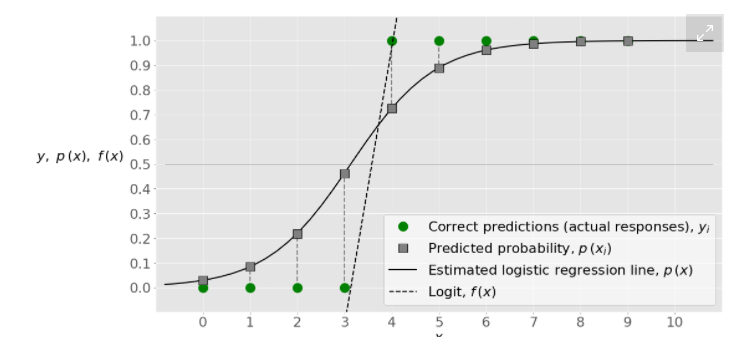

* This figure illustrates that the estimated regression line now has a different shape and that the fourth point is correctly classified as 0. There isn’t a red ×, so there is no wrong prediction.

# EXAMPLE 2 - no linearly separable

In [32]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [33]:
print('x:', x, sep='\n')

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [34]:
print('y:', y, sep='\n', end='\n\n')

y:
[0 1 0 0 1 1 1 1 1 1]



In [42]:
print(f" Model intercept:\n {model.intercept_}", end='\n\n')
print(f" Model coefficient:\n {model.coef_}", end='\n\n')
print(f" Model predictions probabilities: \n {p_pred}", end='\n\n')
print(f" Model y-predictions:\n {y_pred}", end='\n\n')
print(f" Model score:\n {score_}", end='\n\n')
print(f" Model confusion matrix:\n {conf_m}", end='\n\n')

 Model intercept:
 [-1.51632619]

 Model coefficient:
 [[0.703457]]

 Model predictions probabilities: 
 [[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

 Model y-predictions:
 [0 0 0 1 1 1 1 1 1 1]

 Model score:
 0.8

 Model confusion matrix:
 [[2 1]
 [1 6]]



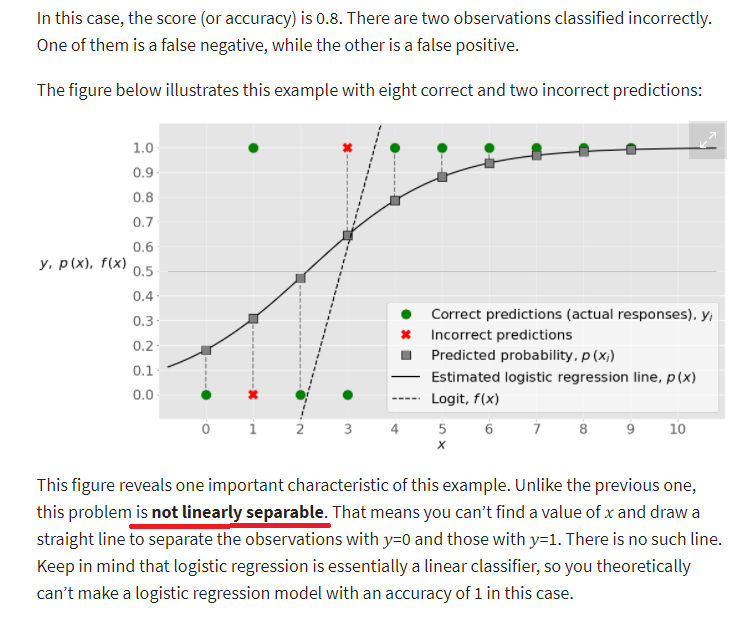